<a href="https://colab.research.google.com/github/Dawitkiros/Learn_pytorch/blob/main/Learn_Transforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import requests
from PIL import Image
from io import BytesIO
import torchvision.transforms as transforms

# URL of the image
image_url = "https://raw.githubusercontent.com/Dawitkiros/Learn_pytorch/main/dog1.jpg"

# Fetch the image
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

In [17]:
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
import torch

# Function to show image
def imshow(img, ax, title=None):
    # If it's a tensor, convert it to a PIL image
    if isinstance(img, torch.Tensor):
        img = img.cpu().clone()
        img = img.squeeze(0)
        img = F.to_pil_image(img)
    if title is not None:
        ax.set_title(title)
    ax.imshow(img)
    ax.axis('off')

In [41]:
# Define transformations to apply
transform = transforms.Compose([
    #transforms.Resize(256),             # Resize to 256x256 pixels
    #transforms.CenterCrop(224),         # Crop to 224x224 pixels at center
    transforms.ToTensor(),              # Convert to PyTorch tensor
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize
    transforms.RandomCrop(224, padding=0),
    transforms.RandomHorizontalFlip(),
])

# Apply the transformations
transformed_image = transform(image)

(500, 500) (224, 224)


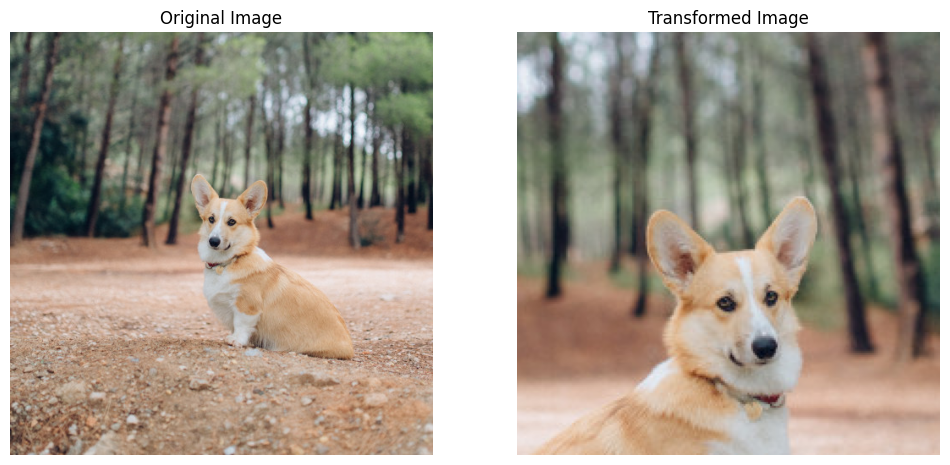

In [42]:
# Create a figure with 1 row and 2 columns for original and transformed images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Show original image
imshow(image, axes[0], title='Original Image')

# Convert the transformed image tensor back to PIL for display
transformed_image_pil = F.to_pil_image(transformed_image)

# Show transformed image
imshow(transformed_image_pil, axes[1], title='Transformed Image')
print(image.size, transformed_image_pil.size)
plt.show()

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Load your dataset
transform = transforms.Compose([transforms.Resize(256), transforms.CenterCrop(224), transforms.ToTensor()])
dataset = datasets.ImageFolder('path/to/your/dataset', transform=transform)
dataloader = DataLoader(dataset, batch_size=64, shuffle=False, num_workers=4)

# Function to calculate mean and std
def calculate_mean_std(dataloader):
    mean = torch.zeros(3)
    std = torch.zeros(3)
    total_images_count = 0

    for images, _ in dataloader:
        batch_samples = images.size(0)  # Batch size (the last batch can have smaller size!)
        images = images.view(batch_samples, images.size(1), -1)
        mean += images.mean(2).sum(0)
        std += images.std(2).sum(0)
        total_images_count += batch_samples

    mean /= total_images_count
    std /= total_images_count

    return mean, std

mean, std = calculate_mean_std(dataloader)
print(f'Mean: {mean}')
print(f'Std: {std}')
